# Tools for the Logic & Language course

by Lasha.Abzianidze@gmail.com

# SpaCy processing

In [1]:
import spacy
print(f"spaCy version={spacy.__version__}")

spaCy version=3.7.5


In [2]:
# downloading spaCy's medium/large model if needed (small is downloaded by default)
# !python -m spacy download en_core_web_lg

In [3]:
NLP = spacy.load("en_core_web_sm")

In [4]:
sent = "This is a sample sentence to be parsed"
doc = NLP(sent)

In [5]:
spacy.displacy.render(doc, style='dep', jupyter=True, options={'fine_grained':True, 'compact':False})

In [6]:
# if many sentences needs to be parsed, use pipe
nlp_sm = spacy.load("en_core_web_sm")
docs_sm = list(NLP.pipe(1000 * [sent]))
print(len(docs_sm))

1000


# CoreNLP parsing

CoreNLP will be used through [Stanza CoreNLP interface](https://github.com/stanfordnlp/stanza/blob/main/demo/Stanza_CoreNLP_Interface.ipynb). CoreNLP provides both constituency and dependency trees. For English, it is possible to directly get dependency trees with a dependency parser or indirectly obtain them by converting the constituency trees into dependecy trees.

In [7]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 37.1 MB/s eta 0:00:00


In [8]:
import stanza
import os
# Download the Stanford CoreNLP package with Stanza's installation command
# This'll take several minutes, depending on the network speed
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)
# Set the CORENLP_HOME environment variable to point to the installation location
os.environ["CORENLP_HOME"] = corenlp_dir
# Import client module
from stanza.server import CoreNLPClient
# src: https://github.com/stanfordnlp/stanza/blob/main/demo/Stanza_CoreNLP_Interface.ipynb
from nltk.tree import Tree

INFO:stanza:Installing CoreNLP package into ./corenlp


INFO:stanza:Downloaded file to ./corenlp/corenlp.zip


## Dependency parsing

In [9]:
sents = ["This is a sample sentence to be parsed", "A brown fox is jumping over the lazy dog"]

In [10]:
# Getting dependency trees from a dependency parser
# https://stanfordnlp.github.io/CoreNLP/depparse.html
with CoreNLPClient(annotators='tokenize,pos,depparse',
                   memory='4G', endpoint='http://localhost:9021', be_quiet=True,
                   output_format='json') as client:
    core_dep_parses = [ client.annotate(s)['sentences'][0] for s in sents ]

INFO:stanza:Writing properties to tmp file: corenlp_server-2b798af2da114245.props
INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9021 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-2b798af2da114245.props -annotators tokenize,pos,depparse -preload -outputFormat json


## Constituency parsing

In [11]:
# Getting dependency trees from a constituency parser
# takes 3-4min
# https://stanfordnlp.github.io/CoreNLP/parse.html
with CoreNLPClient(annotators='tokenize,pos,parse',
                   memory='4G', endpoint='http://localhost:9030', be_quiet=True,
                   output_format='json') as client:
    core_con_parses = [ client.annotate(s)['sentences'][0] for s in sents ]

INFO:stanza:Writing properties to tmp file: corenlp_server-05de0c1d3d244313.props
INFO:stanza:Starting server with command: java -Xmx4G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9030 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-05de0c1d3d244313.props -annotators tokenize,pos,parse -preload -outputFormat json


In [ ]:
# Drawing CoreNLP constituency trees with NLTK's Tree object
Tree.fromstring(core_con_parses[0]['parse']).pretty_print()

     ROOT                                       
      |                                          
      S                                         
  ____|____                                      
 |         VP                                   
 |     ____|____________                         
 |    |                 NP                      
 |    |     ____________|__________              
 |    |    |    |       |          S            
 |    |    |    |       |          |             
 |    |    |    |       |          VP           
 |    |    |    |       |       ___|___          
 |    |    |    |       |      |       VP       
 |    |    |    |       |      |    ___|____     
 NP   |    |    |       |      |   |        VP  
 |    |    |    |       |      |   |        |    
 DT  VBZ   DT   NN      NN     TO  VB      VBN  
 |    |    |    |       |      |   |        |    
This  is   a  sample sentence  to  be     parsed



# AMuSE word senses

We use an API to predict word senses with the help of the multilingual word sense disambiguation system. For more details visit [here](http://nlp.uniroma1.it/amuse-wsd/about).  

In [12]:
import requests

In [13]:
headers = {'accept': 'application/json', 'Content-Type': 'application/json'}
url = 'http://nlp.uniroma1.it/amuse-wsd/api/model'

In [14]:
# disambiguation ENglish sentences
input = [
    {'text': "This table is too long for this room", "lang": "EN" },
    {'text': "The bank is wet", "lang": "EN" }
]

In [15]:
res = requests.post(url, json=input, headers=headers).json()

In [16]:
res

[{'tokens': [{'index': 0,
    'text': 'This',
    'pos': 'DET',
    'lemma': 'this',
    'bnSynsetId': 'O',
    'wnSynsetOffset': 'O',
    'nltkSynset': 'O'},
   {'index': 1,
    'text': 'table',
    'pos': 'NOUN',
    'lemma': 'table',
    'bnSynsetId': 'bn:00075813n',
    'wnSynsetOffset': '4379243n',
    'nltkSynset': 'table.n.02'},
   {'index': 2,
    'text': 'is',
    'pos': 'VERB',
    'lemma': 'be',
    'bnSynsetId': 'bn:00083181v',
    'wnSynsetOffset': '2604760v',
    'nltkSynset': 'be.v.01'},
   {'index': 3,
    'text': 'too',
    'pos': 'ADV',
    'lemma': 'too',
    'bnSynsetId': 'bn:00115274r',
    'wnSynsetOffset': '47392r',
    'nltkSynset': 'excessively.r.01'},
   {'index': 4,
    'text': 'long',
    'pos': 'ADJ',
    'lemma': 'long',
    'bnSynsetId': 'bn:00106125a',
    'wnSynsetOffset': '1433493a',
    'nltkSynset': 'long.a.02'},
   {'index': 5,
    'text': 'for',
    'pos': 'ADP',
    'lemma': 'for',
    'bnSynsetId': 'O',
    'wnSynsetOffset': 'O',
    'nltkSynset'

# Prover9

The NLTK-native tableau prover for FOL cannot handle the equality predicate properly. That's why we will use Prover9, a proper theorem prover from FOL. Fortunately, it is nicely integrated in NLTK classes.        
We need to download Prover9 as it is not by default available in recent NLTK anymore.

In [17]:
import nltk
print(nltk.__version__)

3.9.1


In [18]:
%%bash
prover9_file_name="p9m4-v05.tar.gz"
[[ ${prover9_file_name} =~ (.+)\.tar\.gz ]]
prover9_folder_name=${BASH_REMATCH[1]}
if [[ ! -d ${prover9_folder_name} ]]; then
  curl -sL "https://www.cs.unm.edu/~mccune/prover9/gui/$prover9_file_name" -o ${prover9_file_name}
  tar -xzf ${prover9_file_name}
  rm -rf 'prover9'
  mv ${prover9_folder_name} 'prover9'
  rm ${prover9_file_name}
fi

In [19]:
prover9 = nltk.Prover9()
prover9.config_prover9("/content/prover9/bin")

In [20]:
str2exp = nltk.sem.Expression.fromstring

In [21]:
premises = ["all x.(man(x) -> walks(x))", "not walks(Alex)"]
conclusion = "some y. not man(y)"
prover9.prove(str2exp(conclusion), [ str2exp(p) for p in premises ])

True

In [22]:
conclusion = "exists x. (L(x) & exists y. (E(y) & y = x)) -> exists x.(L(x) & E(x))"
prover9.prove(str2exp(conclusion), [])

True

# Decision trees on SNLI

The code examples below show you how to use `snli_jsonl2dict` function to read data from SNLI files. The read data separates NLI problem info from sentence annotations because many sentences occur in many NLI problems and there is no need to reprocess the same sentences every time it is encountered in an NLI problem. This separation saves space and runtime, and it does make difference when you think of creating feature representations of 550K NLI problems.  

You are also provided with `sen2features`, `problem2features`, and `probs2df` functions to show you how feature selection on a sentence level and a problem level can be done in a modular way. Note that the provided features are very simplistic ones. Try to replace them with more effective or reasonable ones. The final function demostrates how to visually verify/view feature representation of the problems (the latter is useful to verify whether your code is really doing what you think it should be doing).

In [23]:
from tqdm import tqdm
import pandas as pd

In [24]:
# assigntools package is a course specific collection of useful tools
!rm -fr assigntools # helps to rerun this cell witthout errors, if recloning needed
! git clone https://github.com/kovvalsky/assigntools.git

Cloning into 'assigntools'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 255 (delta 22), reused 0 (delta 0), pack-reused 200 (from 1)
Receiving objects: 100% (255/255), 62.92 KiB | 4.49 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [25]:
from assigntools.LoLa.read_nli import snli_jsonl2dict, sen2anno_from_nli_problems
from assigntools.LoLa.sen_analysis import spacy_process_sen2tok, display_doc_dep

## Reading data

In [26]:
from nltk.tree import Tree

In [27]:
# Get SNLI data on fly
!wget https://nlp.stanford.edu/projects/snli/snli_1.0.zip
!unzip snli_1.0.zip
# !rm -r __MACOSX/ snli_1.0/*_test*

--2025-01-25 12:28:40--  https://nlp.stanford.edu/projects/snli/snli_1.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94550081 (90M) [application/zip]
Saving to: ‘snli_1.0.zip’

snli_1.0.zip        100%[===================>]  90.17M  8.00MB/s    in 18s     

2025-01-25 12:28:59 (5.05 MB/s) - ‘snli_1.0.zip’ saved [94550081/94550081]

Archive:  snli_1.0.zip
   creating: snli_1.0/
  inflating: snli_1.0/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/snli_1.0/
  inflating: __MACOSX/snli_1.0/._.DS_Store  
 extracting: snli_1.0/Icon           
  inflating: __MACOSX/snli_1.0/._Icon  
  inflating: snli_1.0/README.txt     
  inflating: __MACOSX/snli_1.0/._README.txt  
  inflating: snli_1.0/snli_1.0_dev.jsonl  
  inflating: snli_1.0/snli_1.0_dev.txt  
  inflating: snli_1.0/snli_1.0_test.jsonl  
  inflating: snli_1.0/snli_1.0_

In [28]:
# takes ~1min to read and pre-process data
# By default it reads the problems that have a gold label.
# SNLI is dict {part: {problem_id: problem_info}}
# S2A is dict {sentence: sentence annotation dict}
SNLI, S2A = snli_jsonl2dict('snli_1.0')

Found .json files for ['dev', 'train', 'test'] parts
processing DEV:	

10000it [00:01, 9670.83it/s]


9842 problems read
0 problems have a wrong annotator label
processing TRAIN:	

550152it [00:49, 11114.56it/s]


549169 problems read
198 problems have a wrong annotator label
processing TEST:	

10000it [00:00, 16237.18it/s]

9824 problems read
0 problems have a wrong annotator label


In [29]:
# access a problem with its ID in the train part
some_prob = SNLI['train']['4804607632.jpg#0r1e']
display(some_prob) # you can use print but the data will be squeezed in a single line

{'g': 'neutral',
 'pid': '4804607632.jpg#0r1e',
 'cid': '4804607632.jpg#0',
 'lnum': 5,
 'lcnt': Counter({'entailment': 2, 'neutral': 3}),
 'ltype': '230',
 'p': 'An older man sits with his orange juice at a small table in a coffee shop while employees in bright colored shirts smile in the background.',
 'h': 'An elderly man sits in a small shop.'}

In [30]:
# The analysis/annotation of the hypothesis sentence
# It includes tokenization, tree structures and pos tags.
# Additionally, for each sentence you can find out in which
# parts, problems, and role (premise or hypothesis) it occurs.
# Check the key "pids" (problemIDs) for this info.
print(f"Sentence: {some_prob['h']}")
S2A[some_prob['h']]

Sentence: An elderly man sits in a small shop.


{'tree': '(ROOT (S (NP (DT An) (JJ elderly) (NN man)) (VP (VBZ sits) (PP (IN in) (NP (DT a) (JJ small) (NN shop)))) (. .)))',
 'btree': '( ( An ( elderly man ) ) ( ( sits ( in ( a ( small shop ) ) ) ) . ) )',
 'tok': ['An', 'elderly', 'man', 'sits', 'in', 'a', 'small', 'shop', '.'],
 'pos': ['DT', 'JJ', 'NN', 'VBZ', 'IN', 'DT', 'JJ', 'NN', '.'],
 'pids': {('train', '4804607632.jpg#0r1e', 'h')}}

In [31]:
# It is a good idea to keep the problem annotations and sentence annotations separately
# because many sentences occur in many NLI problems and you don't want to extract features
# for the same sentence for each problem it occurs in.
# For example the following sentence occurs many times in NLI problems
len(S2A["A man is sleeping."]['pids'])

343

### Displaying syntax trees

In [32]:
# we can read tree representations as NLTK Tree objects
t = Tree.fromstring(S2A[some_prob['h']]['tree'])
print(t)
# better printing
t.pretty_print()

(ROOT
  (S
    (NP (DT An) (JJ elderly) (NN man))
    (VP (VBZ sits) (PP (IN in) (NP (DT a) (JJ small) (NN shop))))
    (. .)))
                     ROOT                       
                      |                          
                      S                         
        ______________|_______________________   
       |                   VP                 | 
       |          _________|___               |  
       |         |             PP             | 
       |         |     ________|____          |  
       NP        |    |             NP        | 
  _____|_____    |    |     ________|____     |  
 DT    JJ    NN VBZ   IN   DT       JJ   NN   . 
 |     |     |   |    |    |        |    |    |  
 An elderly man sits  in   a      small shop  . 



In [33]:
# you need to have svgline installed to display tree objects
! pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.2 MB/s eta 0:00:00


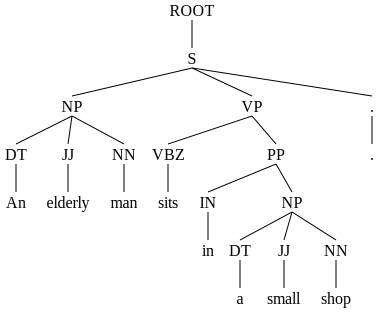

In [34]:
# display tree
t

## Processing with spaCy [optional]

For more reasoning-relevant features, one can use [spaCy](https://spacy.io/) to get dependency parse trees for sentences. In addition to the dependency parsing, spaCy pipeline also does part-of-speech tagging (with general and fine-grained POS tags), named entity recognition, and lemmatization (details [here](https://spacy.io/usage/processing-pipelines)). For a quick intro to spaCy, have a look at the following section in the [spaCy tutorial](https://course.spacy.io/en/): sections 1 & 5 in [chapter 1](https://course.spacy.io/en/chapter1), and 4 & 8 in [chapter 2](https://course.spacy.io/en/chapter2).   
Use attributes of spaCy's [Token objects](https://spacy.io/api/token).  
After annotation, tokens come with two pos tags: fine-grained corresponds to [Penn Treebank pos tags](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) while coarse-grained to [Universal pos tags](https://universaldependencies.org/u/pos/). The dependency parse trees follow the [stanford style](https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf).  

In [35]:
# downloading spaCy's large model
# !python -m spacy download en_core_web_lg
import spacy

In [36]:
NLP = spacy.load("en_core_web_sm")

In [37]:
# SNLI train part contains 640K different sentences
# First, processing all these sentences with spaCy and then using the analyses
# for feature extraction is not feasible as the colab will run out of the memory
# There are two options, either reduce the number of sentecnes by using subpart
# of the training part, or process the sentences with spaCy in batches while
# at the same time converting NLI problems into a set of feature-values
# The former is simpler and this is how you can create new SNLI and S2A variables
print(f"Train contains {len(SNLI['train'])} problems")
print(f"The number of different sentences in SNLI: {len(S2A)}")
# Let's decide that we take first 10K problems from TRAIN
# (the label distribution should reflect the original distribution from the training data)
SNLI['sub_train'] = { pid: SNLI['train'][pid] for pid in sorted(SNLI['train'])[:10000] }
sub_S2A = sen2anno_from_nli_problems({**SNLI['train'], **SNLI['dev']}, S2A)
print(f"The number of different sentences in subTRAIN and DEV: {len(sub_S2A)}")

Train contains 549169 problems
The number of different sentences in SNLI: 651357
The number of different sentences in subTRAIN and DEV: 639908


In [38]:
# process all sentecnes in DEV and subTRAIN with spaCy
# Note thet the following function takes spaCy pipeline and sen->tokens dict
# With the tokenization input, the pipeline is forced to use the same tokenization
sen2Doc = spacy_process_sen2tok(NLP, { sen: anno['tok'] for sen, anno in sub_S2A.items() })

639908it [17:58, 593.53it/s]


In [39]:
display_doc_dep(sen2Doc["A man is sleeping."])

## Create features [demo]

This section shows one way how you could organize your code in a modular and hierarchical way: separate sentence-level features from problem/pair-level features where the latter uses the former. The conversion of the entire training data into feature-values is wrapped in a separate function so that it can work for train, dev and test parts in the similar way.  

In [40]:
# You can modify the function
def sen2features(sen, anno):
    '''
    Takes a sentence and its annotation and returns a dictionary
    of feature:value that characterizes the sentence
    '''
    feats = {}
    # number of tokens
    feats['tok_num'] = len(anno['tok'])
    # number of negation words
    feats['neg_num'] = has_negation(sen, anno)
    # number of nouns
    feats['noun_num'] = len([ t for t in anno['pos'] if t == "NNS" or t == "NN" ])

    feats['plural_noun'] = len([ t for t in anno['pos'] if t == "NNS" or t == "NNPS" ])

    return {**feats, **anno}

In [41]:
# shallow features
def has_negation(sen, anno):
    neg_words =  ["no" , "n't", "not", "never", "none", "no one"]
    return len([ t.lower() in neg_words for t in anno['tok']])

def giveaway_words(sen, anno):
    giveaway_words = ["sleep", "sleeping", "asleep", "slept"]
    giveaway = 1 if any([ t.lower() in giveaway_words for t in anno['tok']]) else 0
    return giveaway



In [42]:
# Add features to the sentence annotations
s2af = { s: sen2features(s, a) for s, a in tqdm(sub_S2A.items()) }

100%|██████████| 639908/639908 [00:06<00:00, 93794.89it/s]


In [43]:
# an example of a sentence with feature-added annotations
s2af['The women is not on her phone.']

{'tok_num': 8,
 'neg_num': 1,
 'noun_num': 2,
 'plural_noun': 1,
 'tree': '(ROOT (S (NP (DT The) (NNS women)) (VP (VBZ is) (RB not) (PP (IN on) (NP (PRP$ her) (NN phone)))) (. .)))',
 'btree': '( ( The women ) ( ( ( is not ) ( on ( her phone ) ) ) . ) )',
 'tok': ['The', 'women', 'is', 'not', 'on', 'her', 'phone', '.'],
 'pos': ['DT', 'NNS', 'VBZ', 'RB', 'IN', 'PRP$', 'NN', '.'],
 'pids': {('train', '109770830.jpg#0r5c', 'h')}}

In [92]:
# You can modify the function
def problem2features(sen1, anno1, sen2, anno2, sen_feats=set(['tok_num', 'neg_num', 'noun_num'])):
    '''
    Takes two sentences and their anotations (_features) and returns a dictionary of
    feature:value that characterizes the sentence pair, i.e. feature is about both sentences
    '''
    features = {}
    # define the sentence-based features that will be part of the problem features
    sen_feats = set('neg_num')
    sen1_feats = { f"{k}1": v for k, v in anno1.items() if k in sen_feats }
    sen2_feats = { f"{k}2": v for k, v in anno2.items() if k in sen_feats }
    # not very smart idea: putting single sentence-based features as pair features
    features = {**sen1_feats, **sen2_feats} # merge two dicts

    # pair-related features
    # if only one of the sentences has a negation
    neg_set = set([anno1['neg_num'], anno2['neg_num']])
    features['neg_diff'] = 1 if (0 in neg_set and len(neg_set) > 1) else 0

    features['token_diff'] = int(anno1['tok_num'] - anno2['tok_num'])/ max(anno1['tok_num'], anno2['tok_num'])

    features['same_tokens'] = len(set(anno1['tok']).intersection(set(anno2['tok']))) / max(len(anno1['tok']), len(anno2['tok']))

    features['same_pos_tags'] = len(set(anno1['pos']).intersection(set(anno2['pos'])))/ max(len(anno1['pos']), len(anno2['pos']))

    features['giveaway'] = giveaway_words(sen2, anno2)

    features['first_word_match'] = 1 if (anno1['tok'][0].lower() == anno2['tok'][0].lower()) else 0

    features['last_word_match'] = 1 if (anno1['tok'][-1].lower() == anno2['tok'][-1].lower()) else 0

    features['plural_noun_diff'] = int(anno1['plural_noun'] - anno2['plural_noun'])

    noun_exist = 1 if ('NN' in anno1['pos'] and 'NN' in anno2['pos']) else 0

    features['noun_match'] = 1 if noun_exist==1 and (anno1['pos'].index('NN')==anno2['pos'].index('NN')) else 0

    pronoun_exist = 1 if ('PRP$' in anno1['pos'] and 'PRP$' in anno2['pos']) else 0

    features['pronoun_match'] = 1 if pronoun_exist==1 and (anno1['tok'][anno1['pos'].index('PRP$')]==anno2['tok'][anno2['pos'].index('PRP$')]) else 0

    numeric = 1 if ('CD' in anno1['pos'] and 'CD' in anno2['pos']) else 0 if ('CD' in anno1['pos'] or 'CD' in anno2['pos']) else -1

    features['numeric_match'] = 1 if numeric==1 and (anno1['tok'][anno1['pos'].index('CD')]==anno2['tok'][anno2['pos'].index('CD')]) else 0

    return features

In [93]:
# You can modify the function, but it might not be necessary as it is pretty general
def problems2df(data_dict, sen2af):
    '''
    Read a dictionary of NLI problems {pid->prob} and
    a dictionary of sentence annotations {sent->anno_feats}
    and represent each problem as a set of feature-values in DatFrame.
    DataFrame offers an easy way of viewing and manipulating data.
    Separate DataFrames are created for labels, features, and sentence pairs
    https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
    '''
    dict_of_feats = { pid: problem2features(prob['p'], sen2af[prob['p']], prob['h'], sen2af[prob['h']])
                      for pid, prob in tqdm(data_dict.items()) }
    # Use  {key : list or dict} to create DataFrame
    gold_labels = { pid:[prob['g']] for pid, prob in data_dict.items() }
    # Don't use label annotations as features as this will be cheating :)
    # Create DataFrame for sentence pairs for visualization
    pair_df = { pid:[f"{prob['p']} ??? {prob['h']}"] for pid, prob in tqdm(data_dict.items()) }
    # make each problem charactersistics as a row
    feat_df = pd.DataFrame(dict_of_feats).transpose()
    lab_df = pd.DataFrame(gold_labels).transpose()
    pair_df = pd.DataFrame(pair_df).transpose()
    # match the order in label, feature and pair farmes
    lab_df.reindex(feat_df.index)
    pair_df.reindex(feat_df.index)
    return feat_df, lab_df, pair_df

In [94]:
feat_df, lab_df, pair_df = problems2df(SNLI['train'], s2af)

100%|██████████| 549169/549169 [00:01<00:00, 513370.66it/s]


In [95]:
# Let's put all three dataframes together for visualization
# Press the magic wand icon after the frame appears
pd.concat([lab_df, feat_df, pair_df], axis=1)

,0,neg_diff,token_diff,same_tokens,same_pos_tags,giveaway,first_word_match,last_word_match,plural_noun_diff,noun_match,pronoun_match,numeric_match,0
3416050480.jpg#4r1n,neutral,0.0,0.166667,0.416667,0.416667,0.0,1.0,1.0,0.0,1.0,0.0,0.0,A person on a horse jumps over a broken down a...
3416050480.jpg#4r1c,contradiction,0.0,0.083333,0.333333,0.416667,0.0,1.0,1.0,0.0,1.0,0.0,0.0,A person on a horse jumps over a broken down a...
3416050480.jpg#4r1e,entailment,0.0,0.250000,0.500000,0.416667,0.0,1.0,1.0,0.0,1.0,0.0,0.0,A person on a horse jumps over a broken down a...
2267923837.jpg#2r1n,neutral,0.0,0.000000,0.333333,0.333333,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,Children smiling and waving at camera ??? They...
2267923837.jpg#2r1e,entailment,0.0,0.333333,0.000000,0.000000,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,Children smiling and waving at camera ??? Ther...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267923837.jpg#3r1c,contradiction,1.0,-0.333333,0.000000,0.222222,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,Four dirty and barefooted children. ??? four k...
2267923837.jpg#3r1n,neutral,0.0,-0.571429,0.214286,0.285714,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,Four dirty and barefooted children. ??? four h...
7979219683.jpg#2r1n,neutral,0.0,0.000000,0.666667,0.500000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,A man is surfing in a bodysuit in beautiful bl...
7979219683.jpg#2r1c,contradiction,0.0,-0.076923,0.461538,0.461538,0.0,1.0,1.0,0.0,1.0,0.0,0.0,A man is surfing in a bodysuit in beautiful bl...


## Training

100%|██████████| 549169/549169 [00:00<00:00, 549811.45it/s]


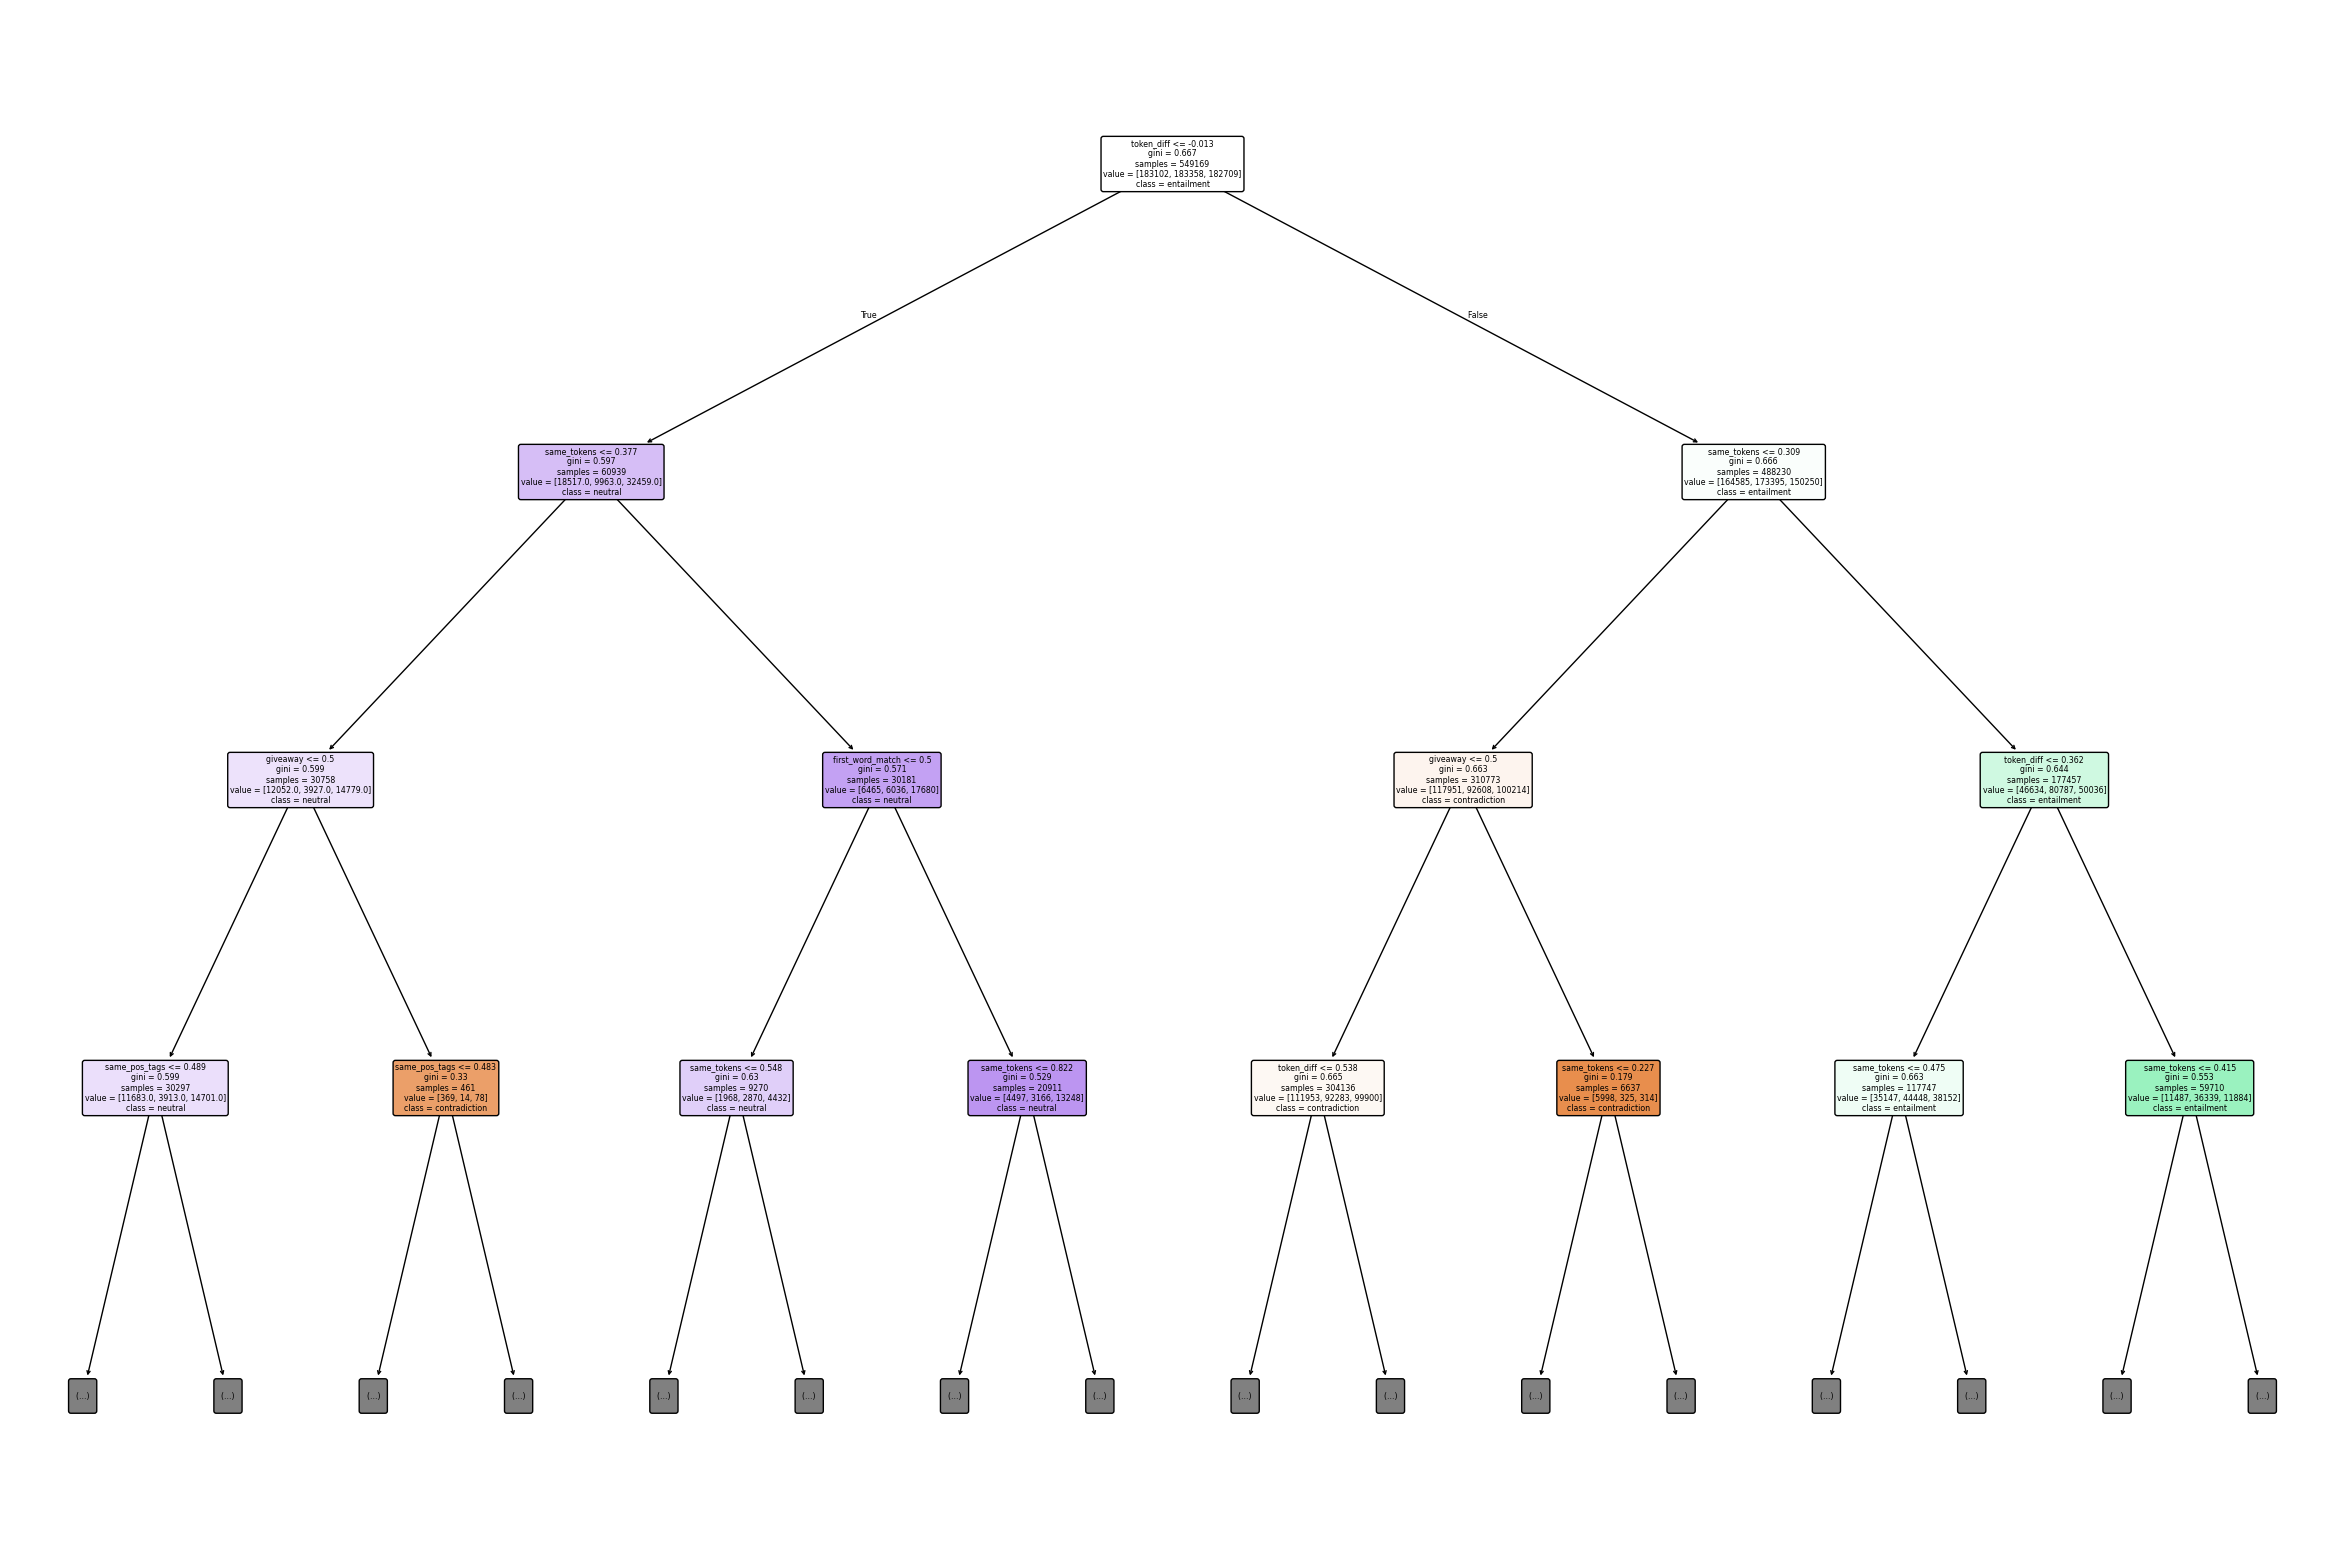

In [96]:
# Just an example with decision trees
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# preparing data and converting it to feature-values
s2af = { s: sen2features(s, a) for s, a in tqdm(sub_S2A.items()) }
feat_df, lab_df, pair_df = problems2df(SNLI['train'], s2af)

# initializing a DT classifier and training it
DT = DTC(criterion="gini", min_samples_split= 200, max_depth=20, random_state=0)
default_DT = DT.fit(feat_df, lab_df)

MODEL = {'cheater': default_DT}

plt.figure(figsize=(30, 20))  # Adjust the figure size
plot_tree(default_DT,
          max_depth=3,
          feature_names=feat_df.columns,
          class_names=default_DT.classes_,
          filled=True,
          rounded=True,
)
plt.show()

## Evaluation

In [97]:

def evaluate(model, dataset, sen2anno):
    """
    model - a classifier to predict NLI classes
    dataset and sem2anno are the similar to the output of snli_jsonl2dict
    dataset - a dict of nli problems: keys are problem ids and values problem descriptions
    sen2anno - a dict of sentence annotations from SNLI: keys are sentences and values its tree, pos tag and tokenozation.
    The function converts problems in dataset into set of feature-values (sen2anno can be used reprocess each sentence once)
    and predicts the inference classes of the problems.
    It can use spacy model "NLP" on-fly to get features based on its analyses.
    Returns a list of predictions and a list of gold values
    """

    # a sample code wich is adapted to the previous code about decision trees
    s2af = { s: sen2features(s, a) for s, a in tqdm(sen2anno.items()) }
    feat_df, lab_df, pair_df = problems2df(dataset, s2af)

    pred_list = model.predict(feat_df)
    return pred_list.tolist(), lab_df.values.squeeze().tolist()

In [98]:
# TEST
from nltk.metrics.scores import accuracy as Accuracy
from nltk.metrics import ConfusionMatrix

S2A_dev = sen2anno_from_nli_problems(SNLI['dev'], S2A)
# The code should also work for 'test' part

for name in MODEL:
    pred, gold = evaluate(MODEL[name], SNLI['dev'], S2A_dev)
    print(f"{name:=^80}")
    print(ConfusionMatrix(gold, pred))
    print(f"Accuracy = {Accuracy(gold, pred)}")
    print(f"{'':=^80}")

100%|██████████| 9842/9842 [00:00<00:00, 350725.06it/s]


====================================cheater=====================================
              |    c           |
              |    o           |
              |    n           |
              |    t    e      |
              |    r    n      |
              |    a    t      |
              |    d    a    n |
              |    i    i    e |
              |    c    l    u |
              |    t    m    t |
              |    i    e    r |
              |    o    n    a |
              |    n    t    l |
--------------+----------------+
contradiction |<1657> 748  873 |
   entailment |  716<1982> 631 |
      neutral | 1157  737<1341>|
--------------+----------------+
(row = reference; col = test)

Accuracy = 0.5059947165210323
